# Thanks to Astropy, Python fits for FITS!

[1] Astropy is a Python library primarily for astronomy. It is a community-based effort to develop a core package to improve your usability, interoperability, and collaboration between astronomy-centered Python packages. One of the packages in Astropy is astropy.io.fits, which lets users access FITS (Flexible Image Transport System) files in Python. It is mainly used to store images and tables.

[2] I picked this package because as an Astronomy student, I am no doubt going to be using Astropy often in my career. Specifically, I hope to be working in observational astronomy and deal with image processing data, so astropy.io.fits will definitely be useful to understand well, since it deals with accessing the files needed to analyze imaging data.

[3] The package is 23 years old, with the oldest changelog entry dating back to February 12, 2002. At the time, it was named PyFITS, and it was a standalone package from Astropy. The last version of PyFITS is from 2016, before it became included with Astropy and became astropy.io.fits. PyFITS is no longer maintained, and instead all new developments happen in Astropy. There is a similar code that solves this problem called fitsio, which is a Python wrapper for the CFITSIO library, while astropy.io.fits accesses the NumPy library. It was implemented almost completely in C around 2011, which happened before PyFITS was adopted into Astropy. The reason Astropy adopted PyFITS instead of fitsio was largely because fitsio was newer and not as fully developed as PyFITS.

In [1]:
import astropy
print(astropy.__version__)

7.0.1


[4] The original developer of PyFITS, Eric Bray, no longer works on the development of astropy.io.fits. PyFITS was also maintained by the Science Software Branch at the Space Telescope Science Institute, and they are still responsible for maintaining astropy.io.fits along with the Astropy community. On the Astropy community website, there are instructions for how to contribute to this project as well as other projects in the Astropy library. The instructions include setting up a development environment, installing and testing the development version, and coding, documentation, and testing guidelines. The current stable release is 7.0.1.

[5] astropy.io.fits is not difficult to install and use. The only line of code needed to import it, after ensuring astropy is installed, is the following:

In [2]:
!pip install astropy
from astropy.io import fits

[6] Astropy can be installed via the standard pip/conda, and it only needs a command to import it.

[7] The source code is available on GitHub.

[8] The code is very widely used by other packages. A couple of examples include photutils, which is used for photometry, and sunpy, which is used for solar physics. In both cases, astropy.io.fits is needed for FITS file handling.

[9] The code is meant to be used for Python scripts, which could be in Jupyter notebooks. It is necessary in any case where FITS files must be handled.

[10, 11] The code can be used to open FITS files and display the image using matplotlib, as shown in the following example.

Filename: ngc6503.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     429   (256, 256, 31, 1)   float32   
Original data shape: (1, 31, 256, 256)
2D image shape: (256, 256)


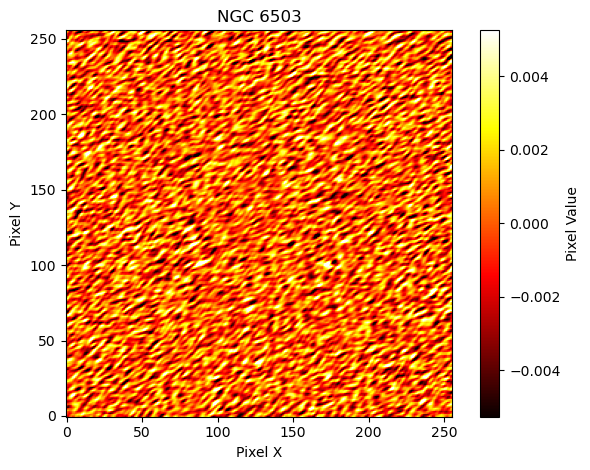

In [3]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# extract data
hdul = fits.open('ngc6503.fits')
hdul.info()
image_data = hdul[0].data
header = hdul[0].header
hdul.close()

# data shape
print("Original data shape:", image_data.shape)
image_2d = image_data[0, 0, :, :]
print("2D image shape:", image_2d.shape)
vmin = np.nanpercentile(image_2d, 1)
vmax = np.nanpercentile(image_2d, 99)

# plot image
fig, ax = plt.subplots()
img = ax.imshow(image_2d, cmap='hot', origin='lower', vmin=vmin, vmax=vmax)
cbar = fig.colorbar(img, ax=ax, label='Pixel Value')
ax.set_title('NGC 6503')
ax.set_xlabel('Pixel X')
ax.set_ylabel('Pixel Y')
fig.tight_layout()

[12] Figure 1: The above image shows galaxy NGC 6503 extracted from a FITS file using astropy.io.fits and matplotlib. The color map displays intensity values.

[13] The package is mostly pure Python, but parts of Astropy rely on C extensions for speed.

[14] The input to the package is a FITS file, such as ngc6503.fits used in the plotting of the data in parts 10 and 11. FITS files contain information about the object in HDUs (Header Data Units) from the data, which could plausibly be created from scratch.

[15] The output of the package is the same, opening and showing the information from the FITS file imported by the package.

[16, 17] Astropy comes with extensive unit testing and a set of tests using the pytest framework can be found in the astropy/io/fits/tests directory on GitHub. These tests can be run to ensure the code is working properly and the results are reliable.

[18] Astropy, and therefore astropy.io.fits, relies mainly on numpy. This can be found via the command:

In [4]:
!pip show astropy

Name: astropy
Version: 7.0.1
Summary: Astronomy and astrophysics core library
Home-page: https://www.astropy.org/
Author: 
Author-email: The Astropy Developers <astropy.team@gmail.com>
License: BSD-3-Clause
Location: C:\Users\franc\AppData\Roaming\jupyterlab-desktop\envs\env_1\Lib\site-packages
Requires: astropy-iers-data, numpy, packaging, pyerfa, PyYAML
Required-by: 


[19] Astropy itself is very well-documented on the [Astropy community hub](https://docs.astropy.org/), which has pages about every aspect of the project, including every sub-package. The page for [astropy.io.fits](https://docs.astropy.org/en/stable/io/fits/index.html) definitely had enough sufficient information to learn about the package and its history.

[20] There is a preferred citation method, and it is detailed [here](https://www.astropy.org/acknowledging.html), on the Astropy website.

[21] References:
[Astropy.org](https://www.astropy.org/)
[GitHub](https://github.com/astropy/astropy/tree/main)

[22] This package is used in plenty of papers, including for [Astropy itself](https://ui.adsabs.harvard.edu/abs/2018AJ....156..123A/abstract) as well as for projects such as [the Pan-STARRS1 Surveys](https://ui.adsabs.harvard.edu/abs/2016arXiv161205560C/abstract).

[23] I did not have to learn any new Python methods to use this package for this project!

[24] I have one instance in a project in a previous class where I used this package, but this provided a much more in-depth study of the code!